In [1]:
# importações
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configurações gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# caminhos dos arquivos
pasta_resultados = "resultados/"
pasta_series = "resultados_series/"

# leitura dos arquivos dos resultados 
dfs_resultados = []
for arquivo in os.listdir(pasta_resultados):
    if arquivo.endswith(".csv"):
        df = pd.read_csv(os.path.join(pasta_resultados, arquivo))
        dfs_resultados.append(df)

df_resultados = pd.concat(dfs_resultados, ignore_index=True)

# leitura das séries
series_completas = []
for arquivo in os.listdir(pasta_series):
    if arquivo.endswith(".csv"):
        df = pd.read_csv(os.path.join(pasta_series, arquivo))
        df["Experimento"] = arquivo  # adiciona nome do experimento
        series_completas.append(df)

df_series = pd.concat(series_completas, ignore_index=True)

G    230.2
dtype: float64
Média de células queimadas por tipo de vegetação:
Q_Baixa: 1757.40
Q_Media: 1827.73
Q_Alta: 1424.27


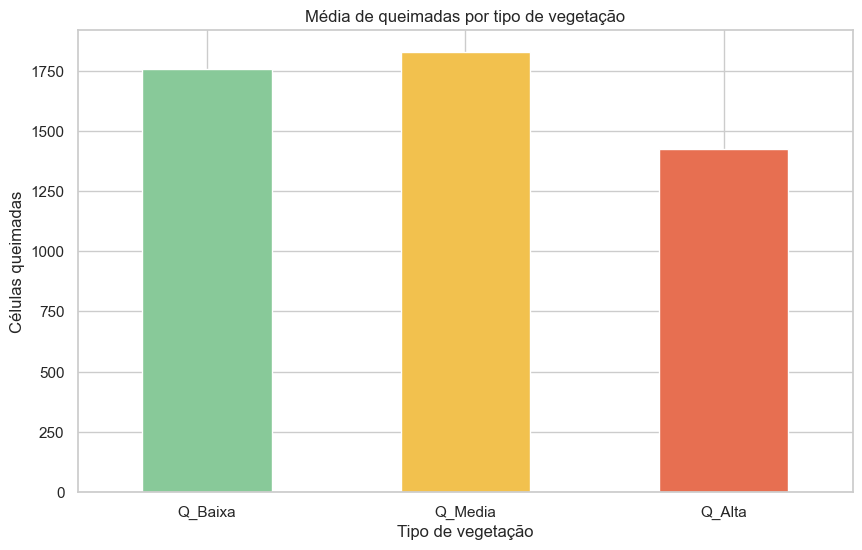

In [3]:
# gráfico da média de queimadas por tipo de vegetação
media_queimados = df_resultados[["Q_Baixa", "Q_Media", "Q_Alta"]].mean()

media_geracoes = df_resultados[["G"]].mean()

print(media_geracoes)

print("Média de células queimadas por tipo de vegetação:")
for tipo, valor in media_queimados.items():
    print(f"{tipo}: {valor:.2f}")


media_queimados.plot(kind="bar", color=["#88c999", "#f2c14e", "#e76f51"])
plt.title("Média de queimadas por tipo de vegetação")
plt.ylabel("Células queimadas")
plt.xlabel("Tipo de vegetação")
plt.xticks(rotation=0)
plt.show()

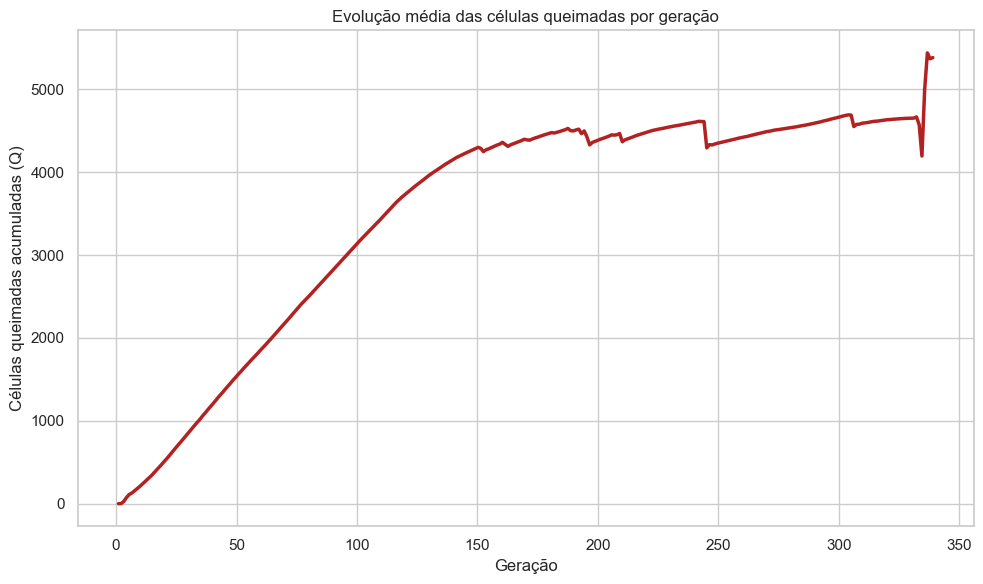

In [4]:
# Agrupa por geração (G) e calcula média das queimadas (Q)
df_media_queimadas = df_series.groupby("G")["Q"].mean().reset_index()

from scipy.interpolate import make_interp_spline
import numpy as np

# Dados brutos
x = df_media_queimadas["G"]
y = df_media_queimadas["Q"]

# Interpolação suave (spline cúbica)
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

# Gráfico com linha suave e mais grossa
plt.plot(x_smooth, y_smooth, color="firebrick", linewidth=2.5)
plt.title("Evolução média das células queimadas por geração")
plt.xlabel("Geração")
plt.ylabel("Células queimadas acumuladas (Q)")
plt.grid(True)
plt.tight_layout()
plt.show()

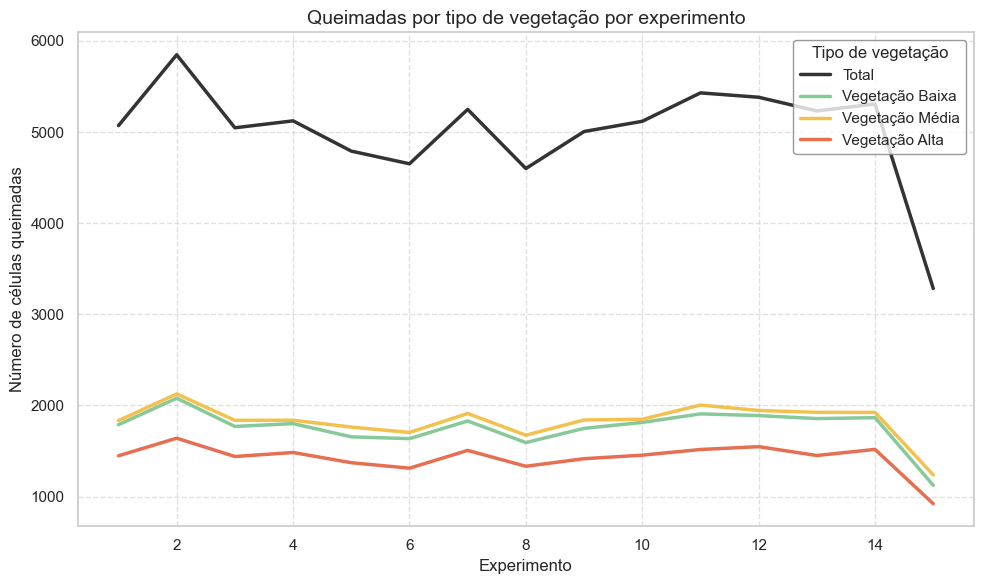

In [5]:
# Adiciona índice para representar o número do experimeno
df_resultados["Experimento"] = df_resultados.index + 1

# Gráfico de linha
plt.plot(df_resultados["Experimento"], df_resultados["Q"], label="Total", linewidth=2.5, color="#333333")
plt.plot(df_resultados["Experimento"], df_resultados["Q_Baixa"], label="Vegetação Baixa", linewidth=2.5, color="#88c999")
plt.plot(df_resultados["Experimento"], df_resultados["Q_Media"], label="Vegetação Média", linewidth=2.5, color="#f2c14e")
plt.plot(df_resultados["Experimento"], df_resultados["Q_Alta"], label="Vegetação Alta", linewidth=2.5, color="#e76f51")

# Ajustes visuais
plt.title("Queimadas por tipo de vegetação por experimento", fontsize=14)
plt.xlabel("Experimento", fontsize=12)
plt.ylabel("Número de células queimadas", fontsize=12)
plt.legend(title="Tipo de vegetação", loc="upper right", frameon=True, facecolor="white", edgecolor="gray")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

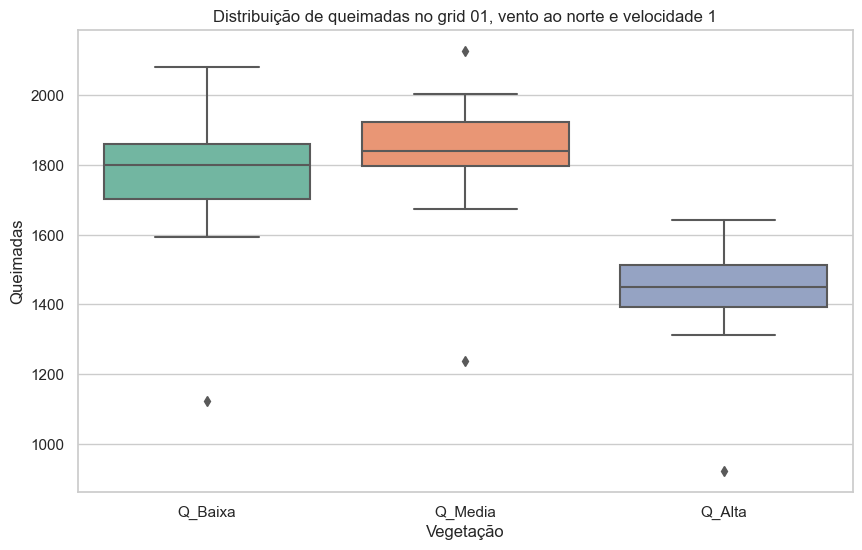

In [6]:
df_melt = df_resultados.melt(id_vars=["TipoGrid"], 
                              value_vars=["Q_Baixa", "Q_Media", "Q_Alta"],
                              var_name="Vegetação", value_name="Queimadas")

sns.boxplot(data=df_melt, x="Vegetação", y="Queimadas", palette="Set2")
plt.title("Distribuição de queimadas no grid 01, vento ao norte e velocidade 1")
plt.show()